<a href="https://colab.research.google.com/github/MuntahaTazeem5/tesla-stock-prices/blob/main/tesla_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Line Plot***

**Problem:** A stock trading firm wants to track Tesla stock prices for 6 months.

**Columns:** date, closing_price

**Steps:**

Load stock data (CSV/Finance API).

Sort by date.

Use sns.lineplot() to show trends.

Look for growth, decline, or volatility.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('/content/HistoricalData_1726367135218.csv')

In [5]:
data=pd.DataFrame(data)
data

,Date,Close/Last,Volume,Open,High,Low
0,09/13/2024,$230.29,59515110,$228.00,$232.67,$226.32
1,09/12/2024,$229.81,72020040,$224.66,$231.45,$223.83
2,09/11/2024,$228.13,83548630,$224.55,$228.47,$216.8003
3,09/10/2024,$226.17,78891140,$220.07,$226.40,$218.6377
4,09/09/2024,$216.27,67443520,$216.20,$219.87,$213.67
...,...,...,...,...,...,...
2512,09/19/2014,$17.288,102014574,$17.1993,$17.4287,$17.018
2513,09/18/2014,$17.588,55342127,$17.5573,$17.7067,$17.488
2514,09/17/2014,$17.4253,77594871,$17.494,$17.6467,$17.30
2515,09/16/2014,$17.3827,124461748,$17.01,$17.4973,$16.828


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [7]:
data.describe()

,Volume
count,2.517000e+03
mean,1.122366e+08
std,7.414325e+07
min,1.065415e+07
25%,6.658297e+07
50%,9.294430e+07
75%,1.295948e+08
max,9.140809e+08


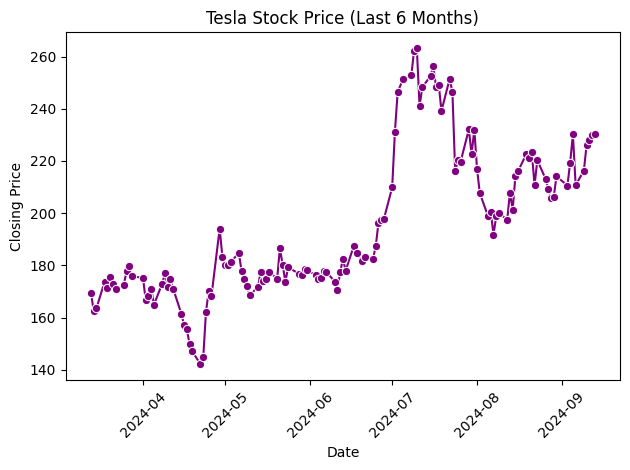

In [14]:
# Convert 'Date' to datetime objects
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Convert 'Close/Last' to numeric, removing the dollar sign
data['Close/Last'] = data['Close/Last'].replace({'$': ''}, regex=True).astype(float)

# Sort data by date
data = data.sort_values(by='Date')

# Filter data for the last 6 months
end_date = data['Date'].max()
start_date = end_date - pd.DateOffset(months=6)
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

sns.lineplot(x="Date", y="Close/Last", data=filtered_data, marker="o", color="purple")
plt.title("Tesla Stock Price (Last 6 Months)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()